In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
sns.set_style('whitegrid')
%matplotlib inline

## Import Data

In [2]:
data =pd.read_csv('data.csv', header=0)

In [3]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,7756,7757,7790,8703,8707,8708,8771,8772,8776,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,7756,7757,7790,8703,8707,8708,8771,8772,8776,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
data.columns

Index([u'Elevation ', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon ', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points ', u'Rawah Wilderness Area',
       u'Neota Wilderness Area', u'Comanche Peak Wilderness Area',
       u'Cache la Poudre Wilderness Area', u'2702', u'2703', u'2704', u'2705',
       u'2706', u'2717', u'3501', u'3502', u'4201', u'4703', u'4704', u'4744',
       u'4758', u'5101', u'5151', u'6101', u'6102', u'6731', u'7101', u'7102',
       u'7103', u'7201', u'7202', u'7700', u'7701', u'7702', u'7709', u'7710',
       u'7745', u'7746', u'7755', u'7756', u'7757', u'7790', u'8703', u'8707',
       u'8708', u'8771', u'8772', u'8776', u'Cover_Type'],
      dtype='object')

# Convert  Binary data to categorical

In [6]:
data["Wilderness Areas"] = data[["Rawah Wilderness Area","Neota Wilderness Area","Comanche Peak Wilderness Area","Cache la Poudre Wilderness Area"]].idxmax(axis=1)

In [7]:
data.columns

Index([u'Elevation ', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon ', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points ', u'Rawah Wilderness Area',
       u'Neota Wilderness Area', u'Comanche Peak Wilderness Area',
       u'Cache la Poudre Wilderness Area', u'2702', u'2703', u'2704', u'2705',
       u'2706', u'2717', u'3501', u'3502', u'4201', u'4703', u'4704', u'4744',
       u'4758', u'5101', u'5151', u'6101', u'6102', u'6731', u'7101', u'7102',
       u'7103', u'7201', u'7202', u'7700', u'7701', u'7702', u'7709', u'7710',
       u'7745', u'7746', u'7755', u'7756', u'7757', u'7790', u'8703', u'8707',
       u'8708', u'8771', u'8772', u'8776', u'Cover_Type', u'Wilderness Areas'],
      dtype='object')

In [8]:
data["Rawah Wilderness Area"].value_counts()

0    320216
1    260796
Name: Rawah Wilderness Area, dtype: int64

In [9]:
data["Comanche Peak Wilderness Area"].value_counts()

0    327648
1    253364
Name: Comanche Peak Wilderness Area, dtype: int64

In [10]:
data["Cache la Poudre Wilderness Area"].value_counts()

0    544044
1     36968
Name: Cache la Poudre Wilderness Area, dtype: int64

In [11]:
data["Neota Wilderness Area"].value_counts()

0    551128
1     29884
Name: Neota Wilderness Area, dtype: int64

In [12]:
check = 260796 + 253364 + 36968 + 29884
check

581012

In [13]:
data["Wilderness Areas"].value_counts()

Rawah Wilderness Area              260796
Comanche Peak Wilderness Area      253364
Cache la Poudre Wilderness Area     36968
Neota Wilderness Area               29884
Name: Wilderness Areas, dtype: int64

In [14]:
data.columns

Index([u'Elevation ', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon ', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points ', u'Rawah Wilderness Area',
       u'Neota Wilderness Area', u'Comanche Peak Wilderness Area',
       u'Cache la Poudre Wilderness Area', u'2702', u'2703', u'2704', u'2705',
       u'2706', u'2717', u'3501', u'3502', u'4201', u'4703', u'4704', u'4744',
       u'4758', u'5101', u'5151', u'6101', u'6102', u'6731', u'7101', u'7102',
       u'7103', u'7201', u'7202', u'7700', u'7701', u'7702', u'7709', u'7710',
       u'7745', u'7746', u'7755', u'7756', u'7757', u'7790', u'8703', u'8707',
       u'8708', u'8771', u'8772', u'8776', u'Cover_Type', u'Wilderness Areas'],
      dtype='object')

In [15]:
data["Soil Type"] = data[["2706","4758","7103","7745","8708","8771","7746","7201","5101","2717","3501","5151","7202","7755",
                         "8772","8776","7756","7700","6101","3502","2702","4201","6102","7701","7757","7790","7702","6731",
                         "4703","2703","2704","4704","7101","2705","4744","7102","7710","8707","7709","8703"]].idxmax(axis=1)

In [16]:
data.columns

Index([u'Elevation ', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon ', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points ', u'Rawah Wilderness Area',
       u'Neota Wilderness Area', u'Comanche Peak Wilderness Area',
       u'Cache la Poudre Wilderness Area', u'2702', u'2703', u'2704', u'2705',
       u'2706', u'2717', u'3501', u'3502', u'4201', u'4703', u'4704', u'4744',
       u'4758', u'5101', u'5151', u'6101', u'6102', u'6731', u'7101', u'7102',
       u'7103', u'7201', u'7202', u'7700', u'7701', u'7702', u'7709', u'7710',
       u'7745', u'7746', u'7755', u'7756', u'7757', u'7790', u'8703', u'8707',
       u'8708', u'8771', u'8772', u'8776', u'Cover_Type', u'Wilderness Areas',
       u'Soil Type'],
      dtype='object')

In [17]:
data["Soil Type"].unique()

array(['7745', '4744', '7746', '6731', '6101', '7102', '7700', '7202',
       '8776', '7101', '3502', '7201', '8772', '4201', '8771', '7757',
       '7755', '7756', '4704', '4703', '2706', '7710', '2705', '2702',
       '4758', '2703', '6102', '2704', '7790', '2717', '5101', '8708',
       '8703', '8707', '7103', '7702', '7709', '7701', '3501', '5151'], dtype=object)

In [18]:
data["Soil Type"].value_counts()

7745    115247
7202     57752
7756     52519
7757     45154
7201     33373
4703     32634
7746     30170
4744     29971
7755     25666
7700     21278
4758     17431
8771     15573
8772     13806
4704     12410
2705     12396
7102      9259
8776      8750
2703      7525
2717      6575
2704      4823
7101      4021
6102      3422
2702      3031
6101      2845
7702      2589
6731      1899
8703      1891
7790      1611
2706      1597
4201      1147
7709      1086
7710       946
7103       838
5101       599
7701       474
8708       298
3502       179
8707       119
3501       105
5151         3
Name: Soil Type, dtype: int64

In [19]:
data["7709"].value_counts()

0    579926
1      1086
Name: 7709, dtype: int64

In [20]:
data["8703"].value_counts()

0    579121
1      1891
Name: 8703, dtype: int64

In [21]:
data["7101"].value_counts()

0    576991
1      4021
Name: 7101, dtype: int64

In [22]:
data["2706"].value_counts()

0    579415
1      1597
Name: 2706, dtype: int64

## Remove the binary tables

In [23]:
explore = data

In [24]:
explore.columns

Index([u'Elevation ', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon ', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points ', u'Rawah Wilderness Area',
       u'Neota Wilderness Area', u'Comanche Peak Wilderness Area',
       u'Cache la Poudre Wilderness Area', u'2702', u'2703', u'2704', u'2705',
       u'2706', u'2717', u'3501', u'3502', u'4201', u'4703', u'4704', u'4744',
       u'4758', u'5101', u'5151', u'6101', u'6102', u'6731', u'7101', u'7102',
       u'7103', u'7201', u'7202', u'7700', u'7701', u'7702', u'7709', u'7710',
       u'7745', u'7746', u'7755', u'7756', u'7757', u'7790', u'8703', u'8707',
       u'8708', u'8771', u'8772', u'8776', u'Cover_Type', u'Wilderness Areas',
       u'Soil Type'],
      dtype='object')

In [25]:
explore = explore.drop(["Rawah Wilderness Area","Neota Wilderness Area","Comanche Peak Wilderness Area","Cache la Poudre Wilderness Area"], axis = 1)

In [26]:
explore.columns

Index([u'Elevation ', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon ', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points ', u'2702', u'2703', u'2704',
       u'2705', u'2706', u'2717', u'3501', u'3502', u'4201', u'4703', u'4704',
       u'4744', u'4758', u'5101', u'5151', u'6101', u'6102', u'6731', u'7101',
       u'7102', u'7103', u'7201', u'7202', u'7700', u'7701', u'7702', u'7709',
       u'7710', u'7745', u'7746', u'7755', u'7756', u'7757', u'7790', u'8703',
       u'8707', u'8708', u'8771', u'8772', u'8776', u'Cover_Type',
       u'Wilderness Areas', u'Soil Type'],
      dtype='object')

In [27]:
explore = explore.drop(["2706","4758","7103","7745","8708","8771","7746","7201","5101","2717","3501","5151","7202","7755",
                         "8772","8776","7756","7700","6101","3502","2702","4201","6102","7701","7757","7790","7702","6731",
                         "4703","2703","2704","4704","7101","2705","4744","7102","7710","8707","7709","8703"], axis = 1)

In [28]:
explore.columns

Index([u'Elevation ', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon ', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points ', u'Cover_Type',
       u'Wilderness Areas', u'Soil Type'],
      dtype='object')

# Data Analysis

In [29]:
# change Wilderness Areas into categorical numbers
areas = {"Wilderness Areas": {"Rawah Wilderness Area":0,"Neota Wilderness Area":1,"Comanche Peak Wilderness Area":2,"Cache la Poudre Wilderness Area":3}}

In [30]:
explore.replace(areas,inplace=True)
explore.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness Areas,Soil Type
0,2596,51,3,258,0,510,221,232,148,6279,5,0,7745
1,2590,56,2,212,-6,390,220,235,151,6225,5,0,7745
2,2804,139,9,268,65,3180,234,238,135,6121,2,0,4744
3,2785,155,18,242,118,3090,238,238,122,6211,2,0,7746
4,2595,45,2,153,-1,391,220,234,150,6172,5,0,7745


In [31]:
explore["Wilderness Areas"].unique()

array([0, 2, 3, 1])

In [32]:
# change Soil Type into categorical numbers
soil = {"Soil Type":{"2706":1,"4758":2,"7103":3,"7745":4,"8708":5,"8771":6,"7746":7,"7201":8,"5101":9,"2717":10,"3501":11,"5151":12,"7202":13,"7755":14,
                         "8772":15,"8776":16,"7756":17,"7700":18,"6101":19,"3502":20,"2702":21,"4201":22,"6102":23,"7701":24,"7757":25,"7790":26,"7702":27,"6731":28,
                         "4703":29,"2703":30,"2704":31,"4704":32,"7101":33,"2705":34,"4744":35,"7102":36,"7710":37,"8707":38,"7709":39,"8703":40}}

In [33]:
explore.replace(soil,inplace=True)
explore.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness Areas,Soil Type
0,2596,51,3,258,0,510,221,232,148,6279,5,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,5,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,2,0,35
3,2785,155,18,242,118,3090,238,238,122,6211,2,0,7
4,2595,45,2,153,-1,391,220,234,150,6172,5,0,4


In [34]:
explore["Soil Type"].unique()

array([ 4, 35,  7, 28, 19, 36, 18, 13, 16, 33, 20,  8, 15, 22,  6, 25, 14,
       17, 32, 29,  1, 37, 34, 21,  2, 30, 23, 31, 26, 10,  9,  5, 40, 38,
        3, 27, 39, 24, 11, 12])

## Descriptive analysis

In [35]:
explore.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness Areas,Soil Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,-0.269554,-0.315590,-0.356355
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,0.017080,0.138703,-0.017014
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,0.148285,0.286178,0.069037
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.020317,0.056339,-0.000672
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,0.081664,0.189085,0.066966
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,-0.153450,-0.445922,-0.255487
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,-0.035415,-0.233455,-0.046635
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,-0.096426,-0.080767,-0.041337
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,-0.048290,0.105050,0.003195
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,-0.108936,-0.416830,-0.046531


In [36]:
explore.groupby("Cover_Type").describe()

Aspect                                                          \
               count        mean         std  min   25%    50%    75%    max   
Cover_Type                                                                     
1           211840.0  156.138227  116.677893  0.0  52.0  122.0  278.0  360.0   
2           283301.0  152.060515  107.658352  0.0  60.0  127.0  241.0  360.0   
3            35754.0  176.372490  107.582644  0.0  90.0  160.0  284.0  360.0   
4             2747.0  137.139425   86.996931  0.0  83.5  119.0  159.0  359.0   
5             9493.0  139.283051   91.568676  0.0  71.0  111.0  191.0  359.0   
6            17367.0  180.539068  133.786561  0.0  43.0  173.0  319.0  360.0   
7            20510.0  153.236226  110.648845  0.0  66.0  123.0  240.0  360.0   

           Elevation               ...  Vertical_Distance_To_Hydrology         \
                count         mean ...                             75%    max   
Cover_Type                         ...                                          
1            211840.0  3128.644888 ...                            62.0  431.0   
2            283301.0  2920.936061 ...                            66.0  601.0   
3             35754.0  2394.509845 ...                            95.0  312.0   
4              2747.0  2223.939934 ...                            72.0  270.0   
5              9493.0  2787.417571 ...                            81.0  265.0   
6             17367.0  2419.181897 ...                            73.0  288.0   
7             20510.0  3361.928669 ...                           107.0  412.0   

           Wilderness Areas                                               
                      count      mean       std  min  25%  50%  75%  max  
Cover_Type                                                                
1                  211840.0  0.914138  0.951238  0.0  0.0  1.0  2.0  2.0  
2                  283301.0  0.946869  0.998754  0.0  0.0  0.0  2.0  3.0  
3                   35754.0  2.600045  0.489896  2.0  2.0  3.0  3.0  3.0  
4                    2747.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0  
5                    9493.0  1.203413  0.979145  0.0  0.0  2.0  2.0  2.0  
6                   17367.0  2.560891  0.496293  2.0  2.0  3.0  3.0  3.0  
7                   20510.0  1.390249  0.857558  0.0  1.0  2.0  2.0  2.0  

[7 rows x 96 columns]

In [37]:
explore.groupby("Wilderness Areas").describe()

Aspect                                                    \
                     count        mean         std  min    25%    50%    75%   
Wilderness Areas                                                               
0                 260796.0  138.280273  106.232453  0.0  56.00  103.0  210.0   
1                  29884.0  182.565118  115.408763  0.0  82.00  158.0  304.0   
2                 253364.0  165.189549  112.023982  0.0  59.00  158.0  266.0   
3                  36968.0  191.156406  125.932512  0.0  65.75  209.5  316.0   

                        Cover_Type            ...   Soil Type        \
                    max      count      mean  ...         75%   max   
Wilderness Areas                              ...                     
0                 360.0   260796.0  1.735928  ...        13.0  40.0   
1                 359.0    29884.0  1.763251  ...        17.0  40.0   
2                 360.0   253364.0  2.157627  ...        25.0  40.0   
3                 360.0    36968.0  3.782947  ...        29.0  34.0   

                 Vertical_Distance_To_Hydrology                               \
                                          count       mean        std    min   
Wilderness Areas                                                               
0                                      260796.0  34.745744  47.114353 -159.0   
1                                       29884.0  44.238690  59.919173 -166.0   
2                                      253364.0  56.153171  65.699674 -173.0   
3                                       36968.0  63.815733  57.864002 -134.0   

                                           
                   25%   50%   75%    max  
Wilderness Areas                           
0                  4.0  22.0  51.0  431.0  
1                  5.0  30.0  71.0  278.0  
2                 10.0  38.0  83.0  601.0  
3                 18.0  51.0  96.0  312.0  

[4 rows x 96 columns]

### Data visualisation

Text(400,-1.8,u'(0 = Rawah; 1 = Neota; 2 = Comanche Peak;3 = Cache la Poudre)')

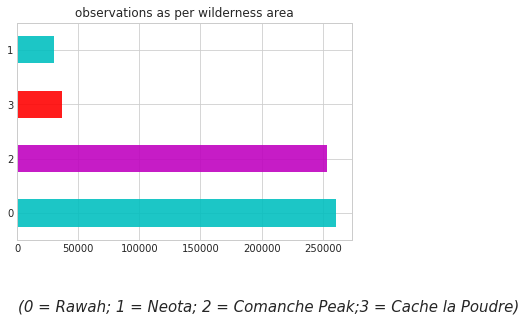

In [38]:
explore["Wilderness Areas"].value_counts().plot(color='cmr',kind='barh', alpha=0.89)
plt.title("observations as per wilderness area")
plt.text(400, -1.8, '(0 = Rawah; 1 = Neota; 2 = Comanche Peak;3 = Cache la Poudre)', style='italic',fontsize=15)

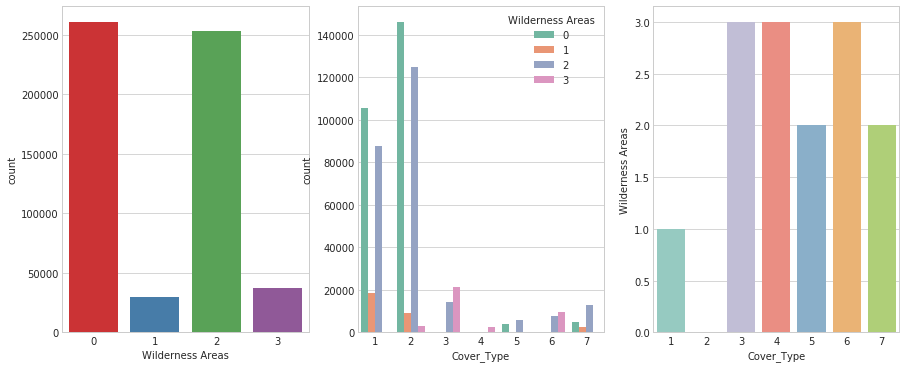

In [39]:

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,6))


sns.countplot(x='Wilderness Areas', data=explore, ax=axis1,  palette="Set1")
sns.countplot(x='Cover_Type', hue="Wilderness Areas", data=explore, ax=axis2, palette="Set2")


area_class = explore[["Cover_Type", "Wilderness Areas"]].groupby(['Cover_Type'],as_index=False).median()
sns.barplot(x='Cover_Type', y='Wilderness Areas', data=area_class,ax=axis3, palette="Set3")

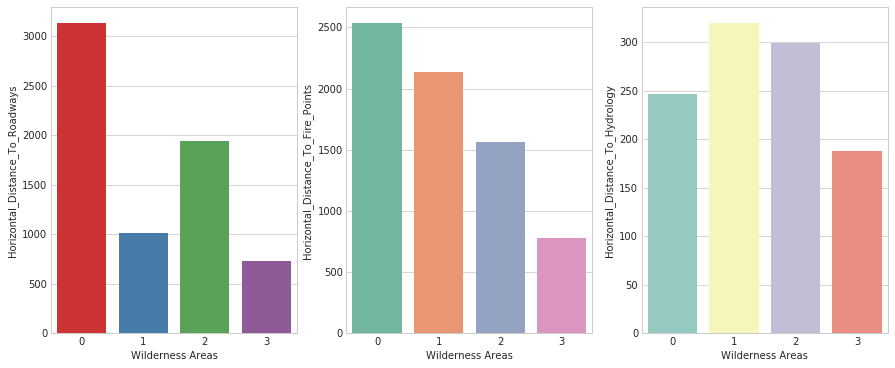

In [40]:

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,6))

area_class1 = explore[["Horizontal_Distance_To_Roadways", "Wilderness Areas"]].groupby(['Wilderness Areas'],as_index=False).mean()
sns.barplot(x='Wilderness Areas', y='Horizontal_Distance_To_Roadways', data=area_class1,ax=axis1, palette="Set1")

area_class2 = explore[["Horizontal_Distance_To_Fire_Points ", "Wilderness Areas"]].groupby(['Wilderness Areas'],as_index=False).mean()
sns.barplot(x='Wilderness Areas', y='Horizontal_Distance_To_Fire_Points ', data=area_class2,ax=axis2, palette="Set2")

area_class = explore[["Horizontal_Distance_To_Hydrology", "Wilderness Areas"]].groupby(['Wilderness Areas'],as_index=False).mean()
sns.barplot(x='Wilderness Areas', y='Horizontal_Distance_To_Hydrology', data=area_class,ax=axis3, palette="Set3")

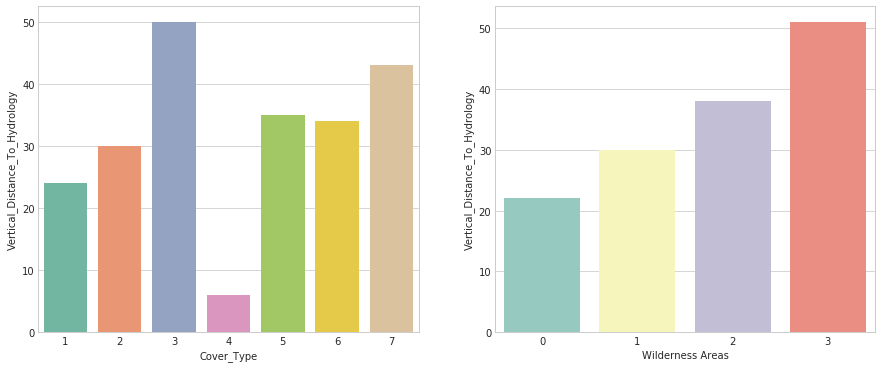

In [41]:

fig, (axis2,axis3) = plt.subplots(1,2,figsize=(15,6))


area_class2 = explore[["Vertical_Distance_To_Hydrology", "Cover_Type"]].groupby(['Cover_Type'],as_index=False).median()
sns.barplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', data=area_class2,ax=axis2, palette="Set2")

area_class = explore[["Vertical_Distance_To_Hydrology", "Wilderness Areas"]].groupby(['Wilderness Areas'],as_index=False).median()
sns.barplot(x='Wilderness Areas', y='Vertical_Distance_To_Hydrology', data=area_class,ax=axis3, palette="Set3")

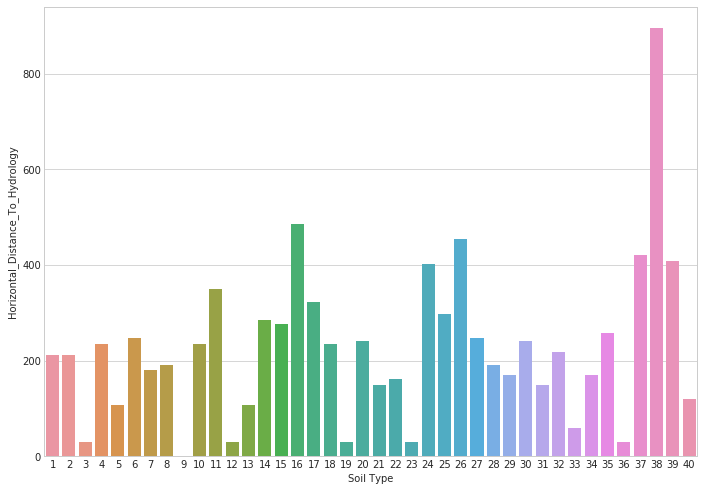

In [42]:
area_class1 = explore[["Horizontal_Distance_To_Hydrology", "Soil Type"]].groupby(['Soil Type'],as_index=False).median()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x='Soil Type', y='Horizontal_Distance_To_Hydrology', data=area_class1,ax=ax)

plt.savefig("hy.png")

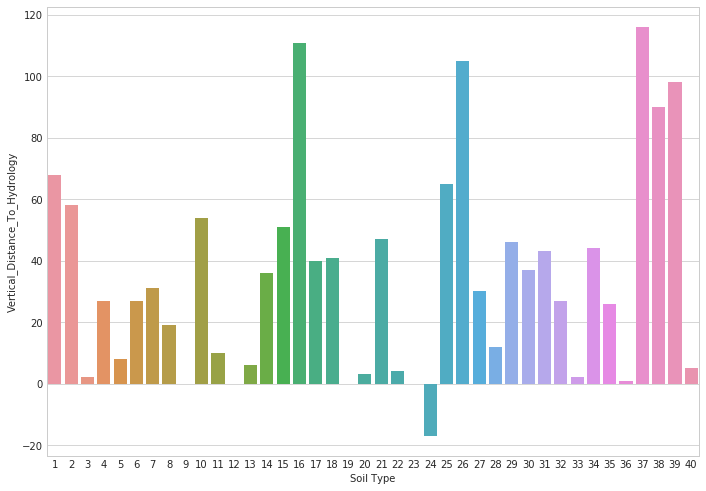

In [43]:
area_class2 = explore[["Vertical_Distance_To_Hydrology", "Soil Type"]].groupby(['Soil Type'],as_index=False).median()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x='Soil Type', y='Vertical_Distance_To_Hydrology', data=area_class2,ax=ax)
plt.savefig("vertical hydrology.png")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e2905c310>]], dtype=object)

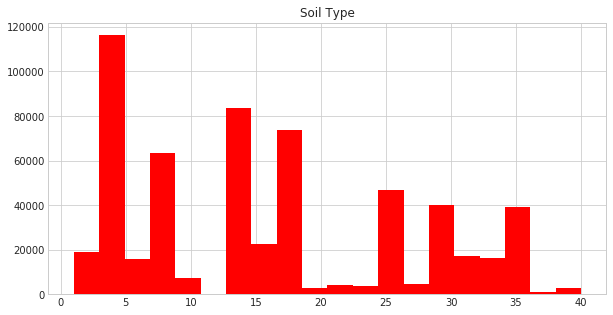

In [44]:
explore.hist(column='Soil Type', figsize=(10,5), bins = 20, color='red')

In [45]:
explore.columns

Index([u'Elevation ', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon ', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points ', u'Cover_Type',
       u'Wilderness Areas', u'Soil Type'],
      dtype='object')

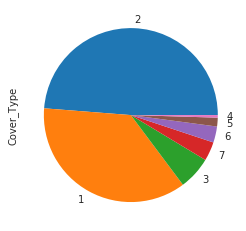

In [46]:
explore['Cover_Type'].value_counts().head(10).plot.pie()

# Unsquish the pie.

plt.gca().set_aspect('equal')
plt.savefig("hist.png")

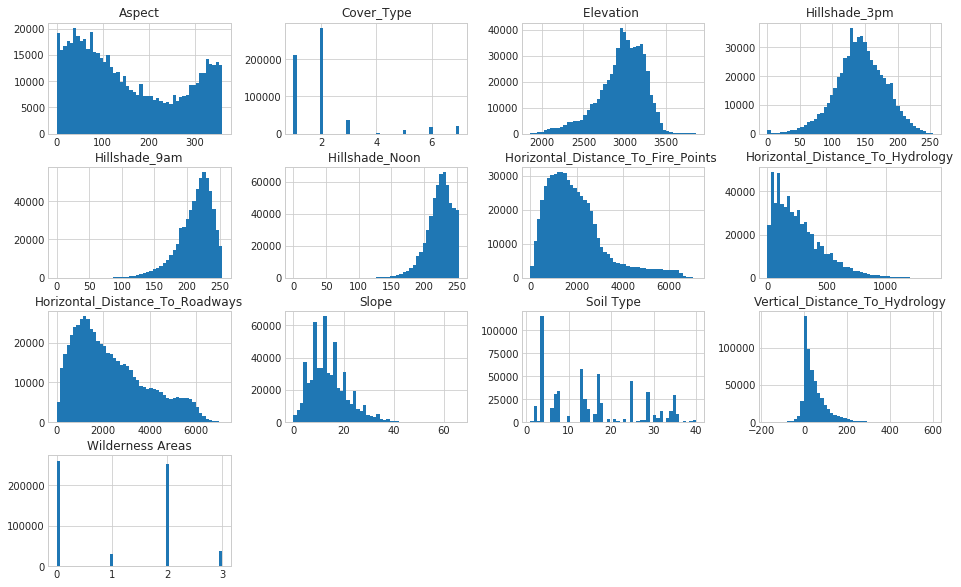

In [47]:
explore.hist(figsize=(16,10), bins=50) 
plt.show()


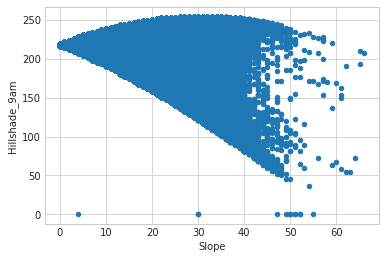

In [48]:
explore.plot(kind="scatter", x="Slope", y="Hillshade_9am")

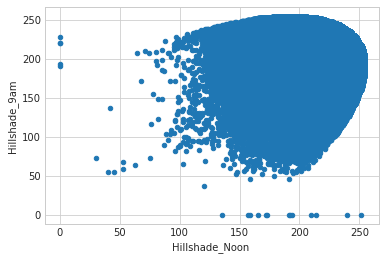

In [49]:
explore.plot(kind="scatter", x="Hillshade_Noon ", y="Hillshade_9am")

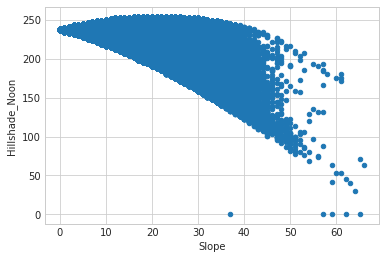

In [50]:
explore.plot(kind="scatter", x="Slope", y="Hillshade_Noon ")

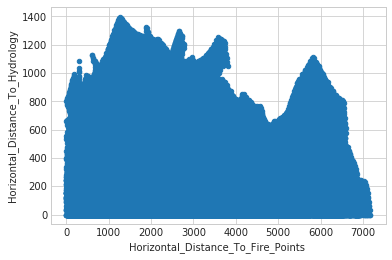

In [51]:
explore.plot(kind="scatter", x="Horizontal_Distance_To_Fire_Points ", y="Horizontal_Distance_To_Hydrology")

/home/carel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


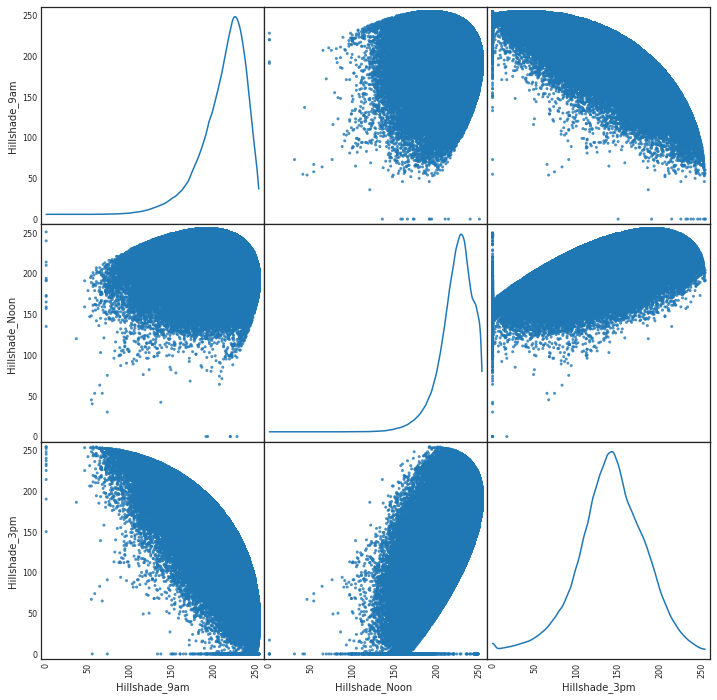

In [52]:
with sns.axes_style('white'): 
    smaller_frame = explore[['Hillshade_9am', 'Hillshade_Noon ','Hillshade_3pm']] 
    scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde") 
    plt.show() 

/home/carel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


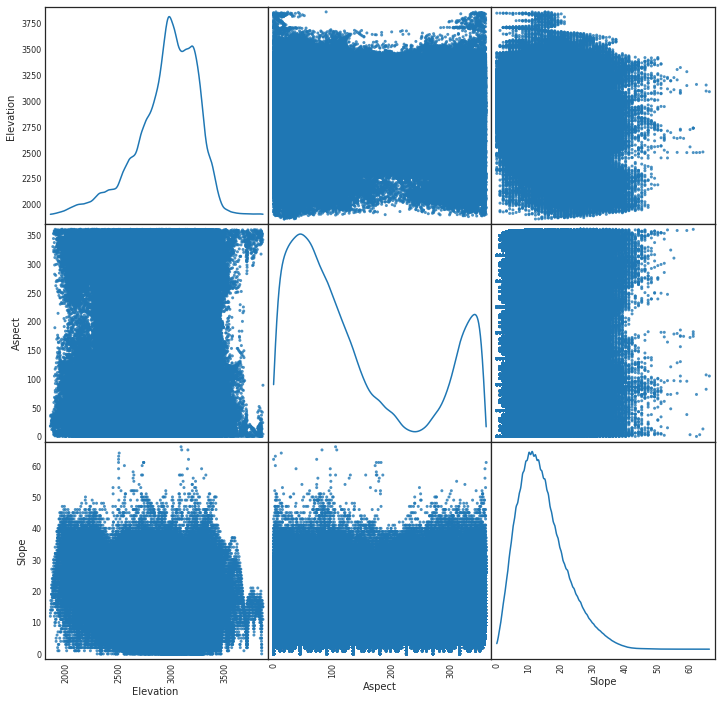

In [53]:
with sns.axes_style('white'): 
    smaller_frame = explore[['Elevation ', 'Aspect','Slope']] 
    scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde") 
    plt.show() 

/home/carel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


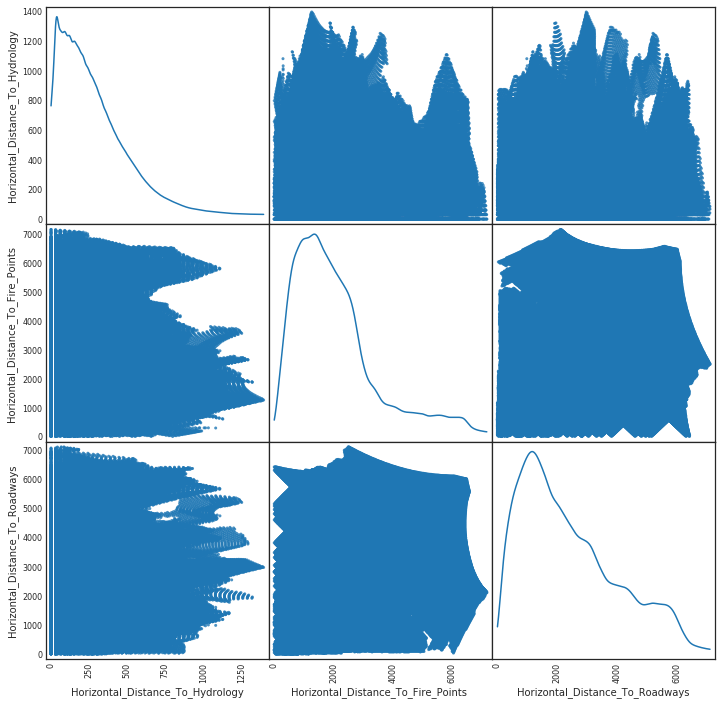

In [54]:
with sns.axes_style('white'): 
    smaller_frame = explore[['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points ','Horizontal_Distance_To_Roadways']] 
    scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde") 
    plt.show() 

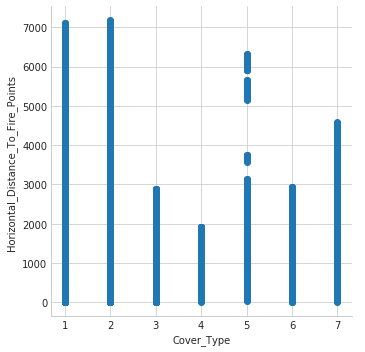

In [55]:
sns.FacetGrid(explore, size=5) \
   .map(plt.scatter, "Cover_Type", "Horizontal_Distance_To_Fire_Points ") \
   .add_legend()

## Map of wilderness areas

In [56]:
location = ["Rawah Wilderness Area","Neota Wilderness Area","Comanche Peak Wilderness Area","Cache la Poudre Wilderness Area"]
location

['Rawah Wilderness Area',
 'Neota Wilderness Area',
 'Comanche Peak Wilderness Area',
 'Cache la Poudre Wilderness Area']

In [57]:
from geopy.geocoders import Nominatim
import geocoder
#geolocator = Nominatim()
def get_gps(place):
    location = geocoder.google(place)
    return location.latlng

In [65]:
coords = [get_gps(x) for x in location]

In [66]:
coords

[[40.7694225, -105.9894578],
 [40.5227606, -105.8325103],
 [40.5827601, -105.6686139],
 [40.65998159999999, -105.4494363]]

In [68]:
total = [260796,29884,253364,36968]
total

[260796, 29884, 253364, 36968]

In [70]:
# a map showing the wilderness areas
import folium
map1 = folium.Map(location=[40.76, -105.98], tiles='Stamen Terrain',zoom_start=5)
for l in xrange(0,len(location)):
        folium.Marker(location=coords[l],popup=location[l]).add_to(map1)
map1

In [71]:
# Heat map
from folium.plugins import HeatMap

m = folium.Map([40.76, -105.98], tiles='Stamen Terrain', zoom_start=6)

HeatMap(coords,total).add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [72]:
explore.columns

Index([u'Elevation ', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon ', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points ', u'Cover_Type',
       u'Wilderness Areas', u'Soil Type'],
      dtype='object')

In [73]:
names = ["Spruce/Fir","Lodgepole Pine","Ponderosa Pine","Cottonwood/Willow","Aspen","Douglas-fir","Krummhol"]

In [74]:
names

['Spruce/Fir',
 'Lodgepole Pine',
 'Ponderosa Pine',
 'Cottonwood/Willow',
 'Aspen',
 'Douglas-fir',
 'Krummhol']

# Create a classification model

## Train/Test split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
y = explore.Cover_Type # define the target variable (dependent variable) as y

In [77]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(explore, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(464809, 13) (464809,)
(116203, 13) (116203,)


In [78]:
predictors = ["Elevation ", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
       "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
       "Hillshade_9am", "Hillshade_Noon ", "Hillshade_3pm",
       "Horizontal_Distance_To_Fire_Points ",
       "Wilderness Areas", "Soil Type"]

## using Regression model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation


alg    = LogisticRegression(random_state=123)
scores = cross_validation.cross_val_score(
    alg,
    X_train[predictors],
    y_train,
    cv=3
)

print(scores.mean())
#alg.score(train_data[predictors], train_data["Survived"])
#score(train_data[predictors], train_data["Survived"])

/home/carel/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.66499357942


In [80]:
model = alg.fit(X_train[predictors],y_train)

In [81]:
predictions =alg.predict(X_test[predictors])

In [82]:
model.score(X_test[predictors], y_test)

0.66805504160822005

In [83]:
print(mean_absolute_error(y_test, predictions))

0.610380110668


In [84]:
accuracy_score(y_test, predictions)

0.66805504160822005

In [85]:
accuracy_score(y_test, predictions, normalize=False)

77630

In [86]:
cnf_matrix = confusion_matrix(y_test, predictions)

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[28714 13623     0     0     0     0    69]
 [11465 44981   198     0     0    13    42]
 [    0  3405  3604     0     0   132     2]
 [    0    82   461     6     0    26     0]
 [   30  1849     0     0     0     0     2]
 [    6  1963  1365     0     0    69     1]
 [ 3636   203     0     0     0     0   256]]


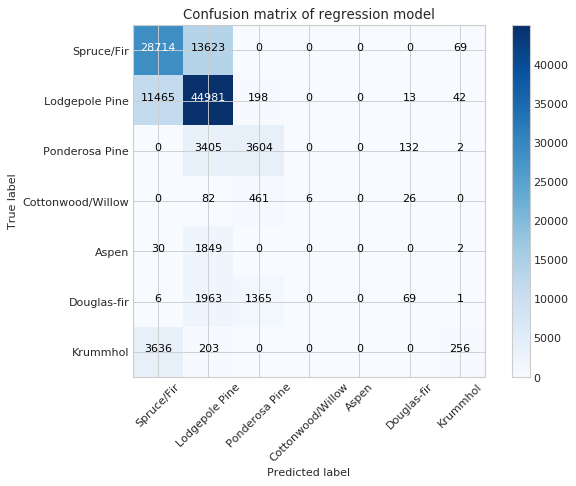

In [88]:
# Plot confusion matrix
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix of regression model')


plt.show()

## Random Forest

In [89]:
predictors

['Elevation ',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon ',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points ',
 'Wilderness Areas',
 'Soil Type']

In [90]:
from sklearn.ensemble import RandomForestClassifier



rdf = RandomForestClassifier(
    random_state=140,
    n_estimators=200,
    min_samples_split=4,
    min_samples_leaf=2
)

scores = cross_validation.cross_val_score(
    rdf,
    X_train[predictors],
    y_train,
    cv=3
)

print(scores.mean())

0.95266227384


In [91]:
model1 = rdf.fit(X_train[predictors],y_train)

In [92]:
predictions_rdf =rdf.predict(X_test[predictors])

In [93]:
model1.score(X_test[predictors], y_test)

0.96243642590983025

In [94]:
print(mean_absolute_error(y_test, predictions_rdf))

0.0652823076857


In [95]:
accuracy_score(y_test, predictions_rdf)

0.96243642590983025

In [96]:
accuracy_score(y_test, predictions_rdf, normalize=False)

111838

In [97]:
cnf_matrix_rdf = confusion_matrix(y_test, predictions_rdf)

Confusion matrix, without normalization
[[40446  1882     0     0     7     1    70]
 [ 1042 55440    98     0    65    47     7]
 [    0    79  6931    24     6   103     0]
 [    0     0    64   499     0    12     0]
 [   18   337    19     0  1499     8     0]
 [    2    66   183    19     4  3130     0]
 [  177    25     0     0     0     0  3893]]


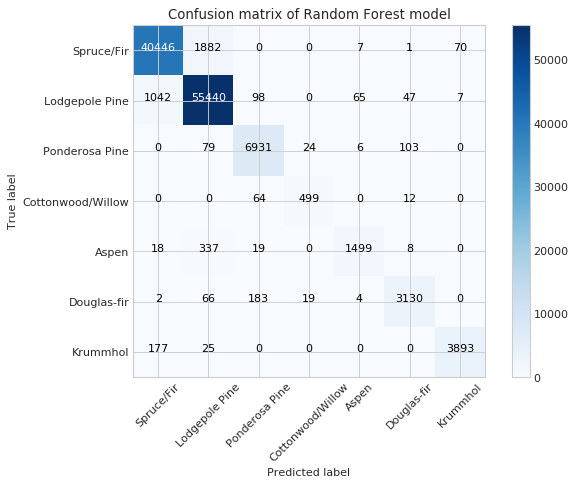

In [99]:
# Plot non-normalized confusion matrix
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot_confusion_matrix(cnf_matrix_rdf, classes=names,
                      title='Confusion matrix of Random Forest model')

plt.show()

## XGBoost

In [100]:
predictors

['Elevation ',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon ',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points ',
 'Wilderness Areas',
 'Soil Type']

In [101]:

from xgboost import XGBRegressor



xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)

scores = cross_validation.cross_val_score(
    xgb,
    X_train[predictors],
    y_train,
    cv=3
)

print(scores.mean())

0.55803913571


In [103]:
model2 = xgb.fit(X_train[predictors],y_train)

In [104]:
predictions_xgb =xgb.predict(X_test[predictors])

In [105]:
model2.score(X_test[predictors], y_test)

0.55945559981292292

In [106]:
print(mean_absolute_error(y_test, predictions_xgb))

0.585303641523


In [107]:
predictions_xgb =  [int(x) for x in predictions_xgb]

In [108]:
accuracy_score(y_test, predictions_xgb)

0.49390291128456237

In [109]:
accuracy_score(y_test, predictions_xgb, normalize=False)

57393

In [110]:
cnf_matrix_xgb = confusion_matrix(y_test, predictions_xgb)

Confusion matrix, without normalization
[[    0     0     0     0     0     0     0     0     0]
 [ 1978 35547  3941   689   174    69     8     0     0]
 [  184 38428 16696  1188   192    10     1     0     0]
 [    0     4  1435  4593  1110     1     0     0     0]
 [    0     0     5   393   177     0     0     0     0]
 [    0   189  1306   311    75     0     0     0     0]
 [    0     7   337  1320  1612   102    24     2     0]
 [    8   324   449   670   601   779   870   356    38]
 [    0     0     0     0     0     0     0     0     0]]


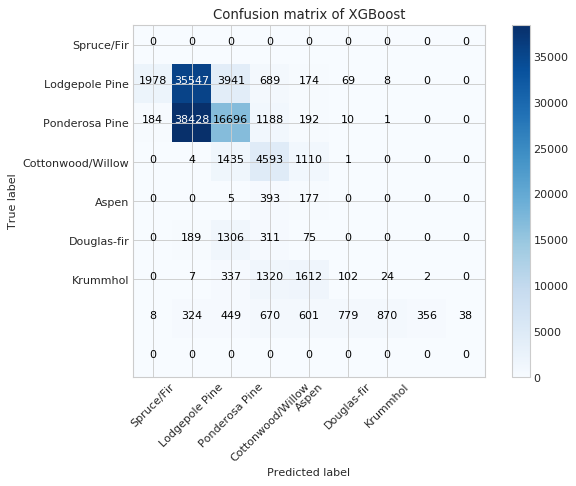

In [111]:
# Plot non-normalized confusion matrix
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot_confusion_matrix(cnf_matrix_xgb, classes=names,
                      title='Confusion matrix of XGBoost')


plt.show()

## Using keras

In [112]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [113]:
import numpy as np
y_train1 = keras.utils.to_categorical(y_train,num_classes=8)
y_test1 = keras.utils.to_categorical(y_test, num_classes=8)


In [114]:
y_train1[0]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [115]:
train = X_train[predictors].values
train[0]
test = X_test[predictors].values

In [116]:
len(test[0])

12

In [117]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model3 = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model3.add(Dense(64, activation='relu', input_dim=12))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(8, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model3.fit(train, y_train1,validation_data=(test,y_test1),epochs=20,batch_size=64)


Train on 464809 samples, validate on 116203 samples
Epoch 1/20
464809/464809 [==============================] - 41s 89us/step - loss: 10.2595 - acc: 0.3635 - val_loss: 10.2361 - val_acc: 0.3649
Epoch 2/20
464809/464809 [==============================] - 40s 85us/step - loss: 10.2507 - acc: 0.3640 - val_loss: 10.2361 - val_acc: 0.3649
Epoch 3/20
464809/464809 [==============================] - 39s 85us/step - loss: 10.2506 - acc: 0.3640 - val_loss: 10.2361 - val_acc: 0.3649
Epoch 4/20
464809/464809 [==============================] - 39s 85us/step - loss: 10.2513 - acc: 0.3640 - val_loss: 10.2361 - val_acc: 0.3649
Epoch 5/20
464809/464809 [==============================] - 39s 84us/step - loss: 10.2514 - acc: 0.3640 - val_loss: 10.2361 - val_acc: 0.3649
Epoch 6/20
464809/464809 [==============================] - 40s 86us/step - loss: 10.2504 - acc: 0.3640 - val_loss: 10.2361 - val_acc: 0.3649
Epoch 7/20
464809/464809 [==============================] - 39s 85us/step - loss: 10.2515 - acc:

In [118]:
score = model3.evaluate(test, y_test1, batch_size=128)

116203/116203 [==============================] - 2s 20us/step


In [119]:
score

[10.23611633250095, 0.36493033742469283]

In [120]:
predictions_kera =model3.predict(test)

In [121]:
print(mean_absolute_error(y_test1, predictions_kera))

0.158767415643


In [122]:
accuracy_score(y_test1, predictions_kera, normalize=False)

42406

## Using keras (ADAM Optimizer)

In [123]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import optimizers

model4 = Sequential()
model4.add(Dense(64, activation='relu', input_dim=12))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(8, activation='softmax'))

model4.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model4.fit(train, y_train1,validation_data=(test,y_test1),epochs=20,batch_size=64)


Train on 464809 samples, validate on 116203 samples
Epoch 1/20
464809/464809 [==============================] - 42s 91us/step - loss: 8.4045 - acc: 0.4783 - val_loss: 8.2536 - val_acc: 0.4879
Epoch 2/20
464809/464809 [==============================] - 41s 89us/step - loss: 8.2607 - acc: 0.4875 - val_loss: 8.2536 - val_acc: 0.4879
Epoch 3/20
464809/464809 [==============================] - 42s 89us/step - loss: 8.2603 - acc: 0.4875 - val_loss: 8.2536 - val_acc: 0.4879
Epoch 4/20
464809/464809 [==============================] - 41s 89us/step - loss: 8.2606 - acc: 0.4875 - val_loss: 8.2536 - val_acc: 0.4879
Epoch 5/20
464809/464809 [==============================] - 42s 90us/step - loss: 8.2603 - acc: 0.4875 - val_loss: 8.2536 - val_acc: 0.4879
Epoch 6/20
464809/464809 [==============================] - 41s 89us/step - loss: 8.2602 - acc: 0.4875 - val_loss: 8.2536 - val_acc: 0.4879
Epoch 7/20
464809/464809 [==============================] - 42s 90us/step - loss: 8.2604 - acc: 0.4875 - val

In [124]:
score1 = model4.evaluate(test, y_test1, batch_size=128)

116203/116203 [==============================] - 2s 21us/step


In [125]:
score1

[8.2535853843340661, 0.48793060420768014]

In [126]:
predictions_kera1 =model4.predict(test)

In [127]:
print(mean_absolute_error(y_test1, predictions_kera1))

0.12801734895


In [128]:
accuracy_score(y_test1, predictions_kera1, normalize=False)

56699

# Conclusion